In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
age1=[var for var in range(10,25)]
income1=np.random.randint(10000,20000,15)

In [16]:
age2=[var for var in range(26,35)]
income2=np.random.randint(25000,35000,len(age2))

In [17]:
age=np.array(age1+age2)

In [18]:
income=np.append(income1,income2)

In [19]:
age[:5]

array([10, 11, 12, 13, 14])

In [20]:
income[:5]

array([14822, 11131, 16893, 19287, 14860])

In [21]:
len(age)

24

In [22]:
len(income)

24

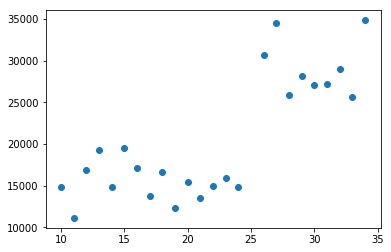

In [23]:
plt.scatter(age,income)

In [32]:
iris=sns.load_dataset('iris')

In [33]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [34]:
feature=iris.drop('species',axis=1)

In [35]:
target=iris['species']

In [36]:
map_dict = { 'setosa':0, 'versicolor':1, 'virginica':2}

In [37]:
target=target.map(map_dict)

In [40]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scale=StandardScaler()

In [43]:
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
scale.fit(feature)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
scaled_feature=scale.transform(feature)

In [47]:
scaled_feature=pd.DataFrame(scaled_feature,columns=feature.columns)

In [48]:
scaled_feature[:5]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,target,test_size=0.3,random_state=101)

In [55]:
x_train.size

420

In [56]:
x_test.size

180

In [57]:
x_train[:5]

,sepal_length,sepal_width,petal_length,petal_width
13,-1.870024,-0.131979,-1.510739,-1.447076
102,1.522676,-0.131979,1.217458,1.185567
67,-0.052506,-0.822570,0.194384,-0.262387
34,-1.143017,0.098217,-1.283389,-1.315444
98,-0.900681,-1.282963,-0.430828,-0.130755


In [58]:
x_test[:5]

,sepal_length,sepal_width,petal_length,petal_width
33,-0.416010,2.630382,-1.340227,-1.315444
16,-0.537178,1.939791,-1.397064,-1.052180
43,-1.021849,1.019004,-1.226552,-0.788916
129,1.643844,-0.131979,1.160620,0.527406
50,1.401508,0.328414,0.535409,0.264142


In [59]:
y_test[:5]

33     0
16     0
43     0
129    2
50     1
Name: species, dtype: int64

In [60]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred=model.predict(x_test)

In [63]:
y_pred[:5]

array([0, 0, 0, 2, 2], dtype=int64)

In [64]:
y_test[:5]

33     0
16     0
43     0
129    2
50     1
Name: species, dtype: int64

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report

In [66]:
mean_absolute_error(y_test,y_pred)

0.15555555555555556

In [67]:
mean_squared_error(y_test,y_pred)

0.15555555555555556

In [69]:
accuracy_score(y_test,y_pred)

0.8444444444444444

In [70]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 14,  6],
       [ 0,  1, 11]], dtype=int64)

In [71]:
x_train.size

420

In [72]:
x_test.size

180

In [73]:
y_train.size

105

In [74]:
y_test.size

45

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.70      0.80        20
           2       0.65      0.92      0.76        12

   micro avg       0.84      0.84      0.84        45
   macro avg       0.86      0.87      0.85        45
weighted avg       0.88      0.84      0.85        45

